In [3]:
import spacy
import pandas as pd

data = pd.read_csv('reddit_opinion_PSE_ISR.csv', sep=',')
data = data.drop(columns=['subreddit', 'post_id', 'author_name', 'user_link_karma', 'user_comment_karma', 'user_total_karma' ])
data

/Users/imamabdullah/Desktop/Bocconi/MSc/Innovation and Marketing Analytics/Reddit/archive (4)


/var/folders/v_/p_bc3k7x5yj64n4z8xm7g_w40000gn/T/ipykernel_6513/448774576.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('reddit_opinion_PSE_ISR.csv', sep=',')


,comment_id,score,self_text,created_time,controversiality,ups,downs,user_is_verified,user_account_created_time,user_awardee_karma,user_awarder_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time
0,l12k67v,1,Yea I do think it's important to keep in mind ...,2024-04-24 17:05:44,0,1,0,True,2013-11-18 02:46:14,18.0,0.0,1406,NaN,Biden signs a $95 billion war aid measure with...,0.97,1406,0,2024-04-24 15:14:00
1,l12k57p,1,It’s not likely that warfare like that ever re...,2024-04-24 17:05:35,0,1,0,True,2022-04-02 01:06:55,0.0,0.0,1406,NaN,Biden signs a $95 billion war aid measure with...,0.97,1406,0,2024-04-24 15:14:00
2,l12k3v0,1,That isn't true: [https://www.reuters.com/worl...,2024-04-24 17:05:22,0,1,0,True,2024-02-17 19:50:36,0.0,0.0,0,"Correct me if I am wrong, but I remember seein...",Reasons to go with force from get-go instead o...,0.50,0,0,2024-04-24 15:30:30
3,l12k3v6,1,By buying the equipment and munitions from Ame...,2024-04-24 17:05:22,0,1,0,True,2022-08-23 19:15:52,183.0,383.0,1406,NaN,Biden signs a $95 billion war aid measure with...,0.97,1406,0,2024-04-24 15:14:00
4,l12k26m,1,Germany already has that and it works pretty w...,2024-04-24 17:05:06,0,1,0,True,2020-08-12 15:31:38,0.0,16.0,50,NaN,EU Parliament backs clampdown on single-use pl...,0.89,50,0,2024-04-24 13:01:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242772,jyt47gw,64,Something similar happened in Sweden recently.,2023-09-02 13:57:37,0,64,0,True,2023-01-26 13:40:40,858.0,0.0,597,NaN,Eritrean immigrants (illegals) fighting in the...,0.94,597,0,2023-09-02 11:52:49
1242773,jyt10so,214,They should leave the anger and hatred back wh...,2023-09-02 13:33:15,0,214,0,True,2014-06-18 09:37:55,1630.0,942.0,597,NaN,Eritrean immigrants (illegals) fighting in the...,0.94,597,0,2023-09-02 11:52:49
1242774,jyszx3n,71,Something similar happened in Germany recently...,2023-09-02 13:24:53,0,71,0,True,2015-07-23 17:01:58,198.0,944.0,597,NaN,Eritrean immigrants (illegals) fighting in the...,0.94,597,0,2023-09-02 11:52:49
1242775,jysrra4,120,Who are the yellow shirts? The referees?,2023-09-02 12:17:34,0,120,0,False,NaN,0.0,0.0,597,NaN,Eritrean immigrants (illegals) fighting in the...,0.94,597,0,2023-09-02 11:52:49


In [6]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Define clean_text function
def clean_text(text):
    '''Reduce text to lower-case lexicon entry'''
    if pd.isna(text):  # Check for missing values
        return ''
    lemmas = [token.lemma_ for token in nlp(text)
              if token.pos_ in {'NOUN', 'VERB', 'ADJ', 'ADV', 'PROPN'}]
    return ' '.join(lemmas)

# Fill missing values in 'self_text' column with an empty string
data['self_text'] = data['self_text'].fillna('')

# Apply clean_text function to 'self_text' column
data['clean_text'] = data['self_text'].apply(clean_text)

In [8]:
import nltk
nltk.downloader.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/imamabdullah/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/imamabdullah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import LabelEncoder

sid = SentimentIntensityAnalyzer()

sentiments = []
for description in data['clean_text']:
    sentiment_scores = sid.polarity_scores(description)
     
    sentiment = 'pos' if sentiment_scores['compound'] > 0 else 'neg'
    sentiments.append(sentiment)

data['sentiment'] = sentiments

labels2numbers = LabelEncoder()
data['sentiment#'] = labels2numbers.fit_transform(data['sentiment'].astype('str'))

sentiments = []
for description in data['clean_text']:
    sentiment_scores = sid.polarity_scores(description)
    sentiment = ''
    for key in sorted(sentiment_scores):
        sentiment += '{0}: {1}, '.format(key, sentiment_scores[key])
    sentiments.append(sentiment)

data['sentiment##'] = sentiments
print(data.head())

  comment_id  score                                          self_text  \
0    l12k67v      1  Yea I do think it's important to keep in mind ...   
1    l12k57p      1  It’s not likely that warfare like that ever re...   
2    l12k3v0      1  That isn't true: [https://www.reuters.com/worl...   
3    l12k3v6      1  By buying the equipment and munitions from Ame...   
4    l12k26m      1  Germany already has that and it works pretty w...   

          created_time  controversiality  ups  downs user_is_verified  \
0  2024-04-24 17:05:44                 0    1      0             True   
1  2024-04-24 17:05:35                 0    1      0             True   
2  2024-04-24 17:05:22                 0    1      0             True   
3  2024-04-24 17:05:22                 0    1      0             True   
4  2024-04-24 17:05:06                 0    1      0             True   

  user_account_created_time  user_awardee_karma  ...  \
0       2013-11-18 02:46:14                18.0  ...   
1   

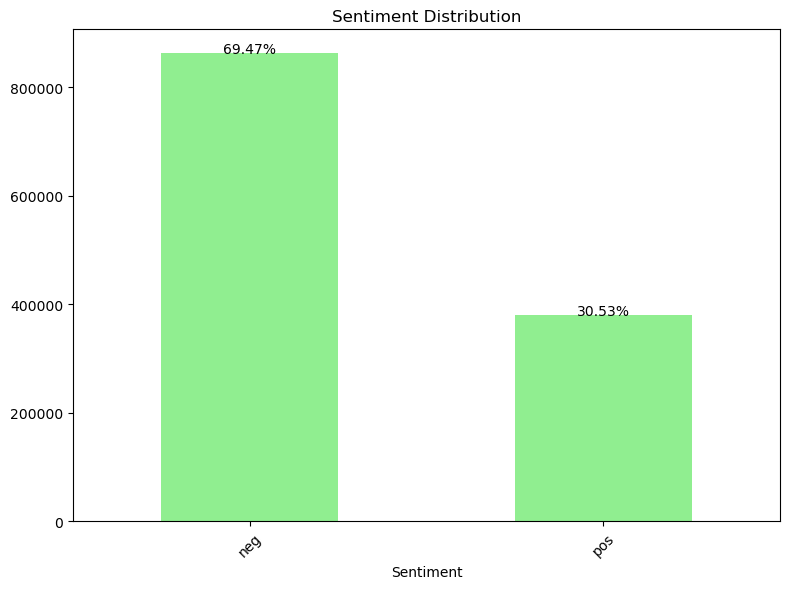

In [10]:
import matplotlib.pyplot as plt
sentiment_counts = data['sentiment'].value_counts()
total_count = sentiment_counts.sum()
percentages = (sentiment_counts / total_count) * 100

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='lightgreen')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('')
plt.xticks(rotation=45)
plt.tight_layout()

# Add labels in percentage format for each bar
for i, count in enumerate(sentiment_counts):
    percentage = percentages[i]
    plt.text(i, count + 0.1, f'{percentage:.2f}%', ha='center')

plt.show()

In [11]:
# Convert 'created_time' column to datetime format
data['created_time'] = pd.to_datetime(data['created_time'])

# Extract month and year from 'created_time' column
data['m/y'] = data['created_time'].dt.strftime('%m/%Y')

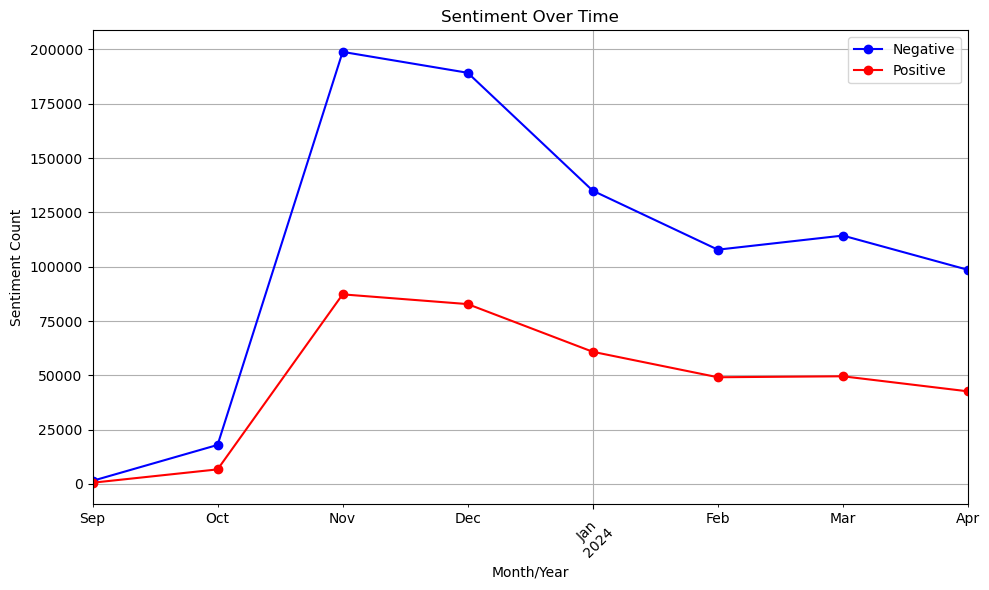

In [12]:
data['m/y'] = pd.to_datetime(data['m/y'])

# Sort data by 'm/y' in chronological order
sorted_data = data.sort_values('m/y')

# Group sorted data by 'm/y' and calculate the average sentiment for each month
monthly_sentiment_0 = sorted_data[sorted_data['sentiment#'] == 0].groupby('m/y')['sentiment#'].count()
monthly_sentiment_1 = sorted_data[sorted_data['sentiment#'] == 1].groupby('m/y')['sentiment#'].count()

# Plot the line plot
plt.figure(figsize=(10, 6))
monthly_sentiment_0.plot(kind='line', marker='o', color='b', label='Negative')
monthly_sentiment_1.plot(kind='line', marker='o', color='r', label='Positive')
plt.title('Sentiment Over Time')
plt.xlabel('Month/Year')
plt.ylabel('Sentiment Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

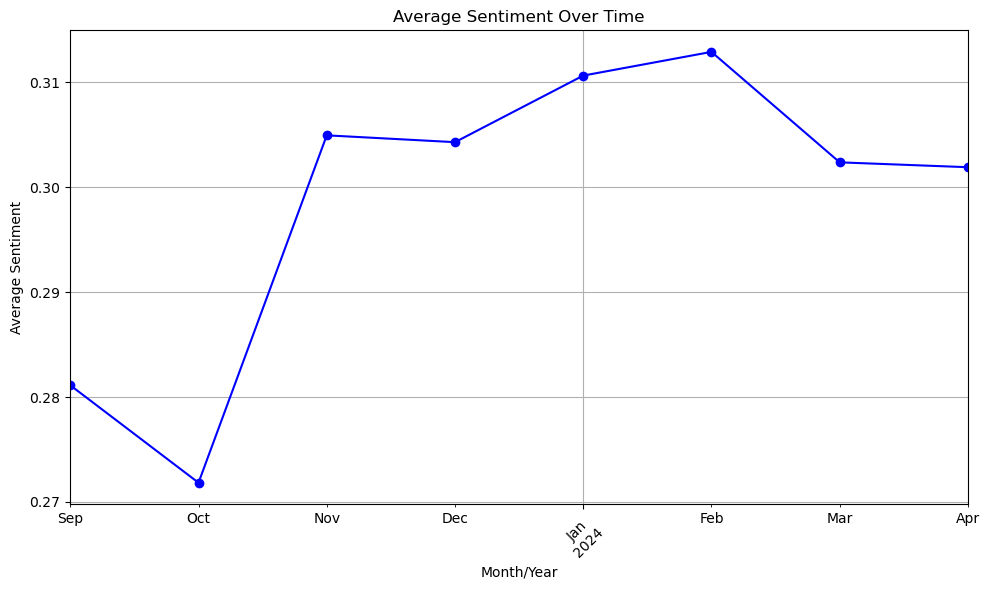

In [13]:
# Convert 'm/y' column to datetime type
data['m/y'] = pd.to_datetime(data['m/y'])

# Sort data by 'm/y' in chronological order
sorted_data = data.sort_values('m/y')

# Group sorted data by 'm/y' and calculate the average sentiment for each month
monthly_sentiment = sorted_data.groupby('m/y')['sentiment#'].mean()

# Plot the line plot
plt.figure(figsize=(10, 6))
monthly_sentiment.plot(kind='line', marker='o', color='b')
plt.title('Average Sentiment Over Time')
plt.xlabel('Month/Year')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()